In [7]:
import os
import math
os.chdir("../codes")
from ZUI_MDP_solution import *

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/home/jonas/Documents/repos/cvut-homeworks/Artificial Intelligence/hw5/codes/ZUI_MDP_solution.py:153: UserWarning: Maximum number of iterations has been exceeded.The iterative evaluation of a policy might have not converged
  warnings.warn('Maximum number of iterations has been exceeded.'


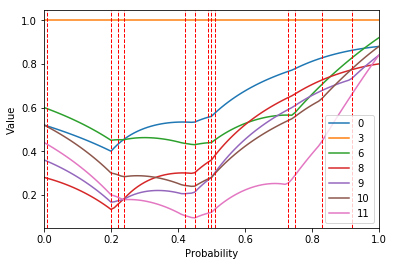

In [14]:
steps = 100

X = np.linspace(0,1.0, steps + 1)
value_mask = [0, 3, 6, 8, 9, 10, 11]

Y = np.zeros((steps + 1, len(value_mask)), dtype = np.float32)
policy_changes = []
old_policy = None
for i in range(steps + 1):
    value = X[i]
    gw = GridWorld.get_world('3x4', action_proba = value)
    Q = gw.policy_iteration()
    V = gw.Q2V(Q)
    policy = gw.Q2policy(Q)
    
    Y[i,:] = V[value_mask]
    
    if not old_policy is None:
        if not np.array_equal(policy, old_policy):
            policy_changes.append(value)
    old_policy = policy
    
plt.plot(X, Y)    
for p_change in policy_changes:
    plt.axvline(x=p_change, linestyle='dashed', color = 'red', lw = 1)

plt.legend(value_mask)
plt.xlim([0, 1.0])
plt.xlabel('Probability')
plt.ylabel('Value')
plt.savefig('../report/figures/e1.pdf', dpi=500, transparent=True)
plt.show()

In [15]:
print(policy_changes)

[0.01, 0.2, 0.22, 0.24, 0.42, 0.45, 0.49, 0.5, 0.51, 0.73, 0.75, 0.8300000000000001, 0.92]
